## 1. Install and Import Dependencies

In [2]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
  Using cached https://download.pytorch.org/whl/lts/1.8/cpu/torch-1.8.2%2Bcpu-cp39-cp39-win_amd64.whl (191.7 MB)
  Using cached https://download.pytorch.org/whl/lts/1.8/cpu/torchvision-0.9.2%2Bcpu-cp39-cp39-win_amd64.whl (847 kB)
  Using cached https://download.pytorch.org/whl/lts/1.8/torchaudio-0.8.2-cp39-none-win_amd64.whl (109 kB)
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached Pillow-9.0.1-cp39-cp39-win_amd64.whl (3.2 MB)


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
!pip install ipywidgets widgetsnbextension pandas-profiling

  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached widgetsnbextension-3.6.0-py2.py3-none-any.whl (1.6 MB)
     -------------------------------------- 261.2/261.2 KB 4.0 MB/s eta 0:00:00
  Using cached jupyterlab_widgets-1.1.0-py3-none-any.whl (245 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached nbformat-5.2.0-py3-none-any.whl (74 kB)
  Using cached notebook-6.4.10-py3-none-any.whl (9.9 MB)
     -------------------------------------- 102.4/102.4 KB 5.8 MB/s eta 0:00:00
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
     ------------------------------------- 685.8/685.8 KB 10.9 MB/s eta 0:00:00
     -------------------------------------- 303.1/303.1 KB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 19.0 MB/s e

In [8]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [1]:
# Torch will be used to load the YOLO model and make detections
import torch
# matplotlib will be used for visualising images
from matplotlib import pyplot as plt
# Numpy will be used for array transformation
import numpy as np
# OpenCV helps access the webcam and render feeds
import cv2

 ## 2. Load Model

In [2]:
# downloading the pre-trained ultralytics model from Pytorch hub
# torch hub is like tenserflow but pytorch equivalent
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

Using cache found in C:\Users\Jimmy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-23 torch 1.8.2+cpu CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 49.0 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
           

## 3. Make Detections with Images

In [4]:
# img = 'https://ultralytics.com/images/zidane.jpg'
# img = 'bao1.jpg'
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKlewM5XH0Wqi6jGo2MnCDIXh9WzXIFSZx0A&usqp=CAU'

In [5]:
results = model(img)
results.print()

image 1/1: 194x259 5 traffic lights
Speed: 4457.3ms pre-process, 595.1ms inference, 11.0ms NMS per image at shape (1, 3, 480, 640)


In [6]:
# tap . and tab to show the components
# xyxy: The output from running results.xyxy is as follows: 
# -xmin, ymin, xmax, ymax, confidence, class
results.xyxy

[tensor([[ 44.36666,  77.59405,  54.26304, 101.37655,   0.83875,   9.00000],
         [ 98.82001,  85.88572, 106.95550, 103.88567,   0.82917,   9.00000],
         [123.33652,  87.75838, 134.78018, 102.98830,   0.68558,   9.00000],
         [193.16435, 119.18129, 200.67171, 135.76051,   0.65828,   9.00000],
         [183.85732, 115.98401, 191.08345, 138.91231,   0.35376,   9.00000]])]

In [7]:
results.show()

In [8]:
# return the image with the detections drawn on it
results.render()

[array([[[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 92, 149, 216],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 83, 141, 204],
         [ 83, 141, 204],
         [ 83, 141, 204]],
 
        ...,
 
        [[126, 108,  86],
         [126, 108,  86],
         [126, 108,  86],
         ...,
         [100,  86,  77],
         [100,  86,  77],
         [100,  86,  77]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
         [ 90,  75,  68],
         [ 90,  75,  68]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
  

In [9]:
np.array(results.render()).shape

(1, 194, 259, 3)

In [10]:
np.squeeze(results.render()).shape

(194, 259, 3)

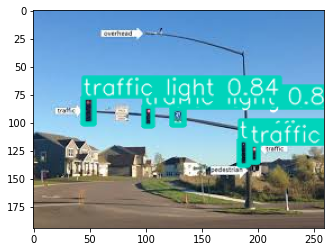

In [11]:
# render
# %matplotlib inline: the matplotlib magic function passed in the inline
# argument to make sure that it displays all matplotlib output in the 
# notebook instead of an external window
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [12]:
# test video
# cap = cv2.VideoCapture('Space Invaders 2021-11-04 23-10-02.mp4')

# test real camera
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Data processing

In [13]:
import numpy as np
import pandas as pd
import os

ANNOTATIONS_PATH = os.path.join('archive', 'Annotations', 'Annotations')

paths = {
    'DAY_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'dayTrain'),
    'NIGHT_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'nightTrain'),
    'DAY_IMAGE_PATH' : os.path.join('archive', 'dayTrain', 'dayTrain'),
    'NIGHT_IMAGE_PATH' : os.path.join('archive', 'nightTrain', 'nightTrain')
}

# try to implement the first day's training dataset
df = pd.read_csv(os.path.join(paths['DAY_TRAIN_PATH'],'dayClip1', 'frameAnnotationsBOX.csv'), sep=';')
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin file,Origin frame number,Origin track,Origin track frame number
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,358,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,411,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,357,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,410,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,356,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2


In [14]:
# check for duplicate column
np.all(df['Origin file'] == df['Origin track']), np.all(df['Origin frame number'] == df['Origin track frame number'])

(True, True)

In [15]:
# drop duplicate columns and 'Origin file' columns
df = df.drop(columns=['Origin track', 'Origin track frame number', 'Origin file'])
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,358,0
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,411,0
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,357,1
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,410,1
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,356,2


In [16]:
def simplifyFilename(file):
    splitted = file.split('/')
    simplify = splitted[-1]
    return simplify
df['Filename'] = df['Filename'].apply(simplifyFilename)
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number
0,dayClip1--00000.jpg,go,698,333,710,358,0
1,dayClip1--00000.jpg,go,846,391,858,411,0
2,dayClip1--00001.jpg,go,698,337,710,357,1
3,dayClip1--00001.jpg,go,847,390,859,410,1
4,dayClip1--00002.jpg,go,698,331,710,356,2


In [17]:
# Changing Column Names
df.columns = ['image','annotation','left_x','upper_y','right_x','lower_y','frame']
df.head()

,image,annotation,left_x,upper_y,right_x,lower_y,frame
0,dayClip1--00000.jpg,go,698,333,710,358,0
1,dayClip1--00000.jpg,go,846,391,858,411,0
2,dayClip1--00001.jpg,go,698,337,710,357,1
3,dayClip1--00001.jpg,go,847,390,859,410,1
4,dayClip1--00002.jpg,go,698,331,710,356,2


In [18]:
annotations = df['annotation'].unique()
annotations

array(['go', 'stop'], dtype=object)

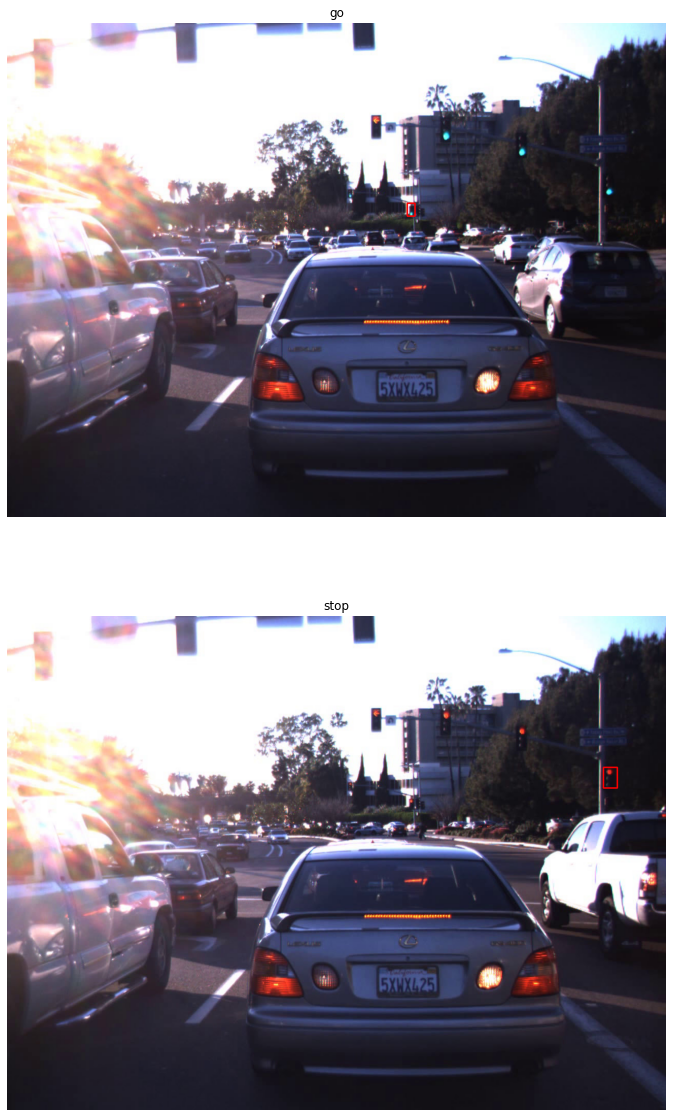

In [19]:
# make len(annotations) numbers of plots
fig, ax = plt.subplots(len(annotations),1,figsize=(15,10*len(annotations)))

# loop through annotations: go, stop...
for i, annotation in enumerate(annotations):
    # pick one sample belong to the annotation in the df
    # DataFrame.sample(n=None, frac=None, replace=False, weights=None, 
    #    random_state=None, axis=None, ignore_index=False)
    # Return a random sample of items from an axis of object.
    sample = df[df['annotation']==annotation].sample(1)
    # convert to numpy array from the sample df 
    sample_arr = sample[['left_x','upper_y','right_x','lower_y']].values[0]
    
    image_name = sample['image'].values[0]
    dayOrNight = image_name.split('--')[0]    
    path = os.path.join(paths['DAY_IMAGE_PATH'], dayOrNight, 'frames', image_name)
    
    image = cv2.imread(path)
    # When the image file is read with the OpenCV function imread(), the order of colors 
    # is BGR (blue, green, red). We need to convert it to be RGB (red, green, blue)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    # Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(image,(sample_arr[0],sample_arr[1]),(sample_arr[2],sample_arr[3]),(255, 0, 0), 2)
    
    ax[i].set_title(annotation)
    ax[i].set_axis_off()
    ax[i].imshow(image)



## 6. Data Training

In [13]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [90]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable


In [16]:
for index, row in df.iterrows():
    textfile = row['image'].split('.')[0] + '.txt'
    textfile_path = os.path.join(paths['DAY_TRAIN_PATH'], 'dayClip1', 'labels', textfile)
    # YOLO Format: the YOLO annotation format represents the following values in order:
    # -class number, -x centre coordinate, -y cetre coordinate, -width, -height
    with open(textfile_path, 'a') as f:
        image_annotation = row['annotation']
        if image_annotation == 'go':
            image_class = 0
        elif image_annotation == 'stop':
            image_class = 1
            
        image_width = 1280
        image_height = 960
        
        left_x = row['left_x']
        upper_y = row['upper_y']
        right_x = row['right_x']
        lower_y = row['lower_y']
        
        x_center = (left_x + right_x) / 2 / image_width
        y_center = (upper_y + lower_y) / 2 / image_height
        width = (right_x - left_x) / image_width
        height = (lower_y - upper_y) / image_height
        
        f.write(str(image_class))
        f.write(' ')
        f.write(str(x_center))
        f.write(' ')
        f.write(str(y_center))
        f.write(' ')
        f.write(str(width))
        f.write(' ')
        f.write(str(height))
        f.write('\n')

In [ ]:
# may test some small samples for training to test the correctness
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yml --weights yolov5m.pt --workers 2